In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

torch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


PosixPath('data/pizza_steak_sushi_20_percent')

In [ ]:
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
#setup pretrained EffNetB2 wegihts
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# Setup pretrained model instance
effnetb2 = torchvision.models.efficientnet_b2(weights= effnetb2_weights)

for params in effnetb2.parameters():
  params.requires_grad = False

In [ ]:
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace = True),
    nn.Linear(in_features=1408, out_features=3, bias= True)
)

In [ ]:
# summary(model=effnetb2,
#         input_size = (1,3,224,224),
#         col_names=["input_size","output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

In [ ]:
def create_effnetb2_model(num_classes:int=3,
                          ):
  #setup pretrained EffNetB2 wegihts
  weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
  transforms = weights.transforms()
  model = torchvision.models.efficientnet_b2(weights=weights)

  for params in model.parameters():
    params.requires_grad = False

  model.classifier = nn.Sequential(
      nn.Dropout(p=0.3, inplace = True),
      nn.Linear(in_features=1408, out_features=num_classes)
  )

  return model, transforms

In [ ]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3)

In [ ]:
from going_modular.going_modular import data_setup

train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform = effnetb2_transforms,
    batch_size=32
)

In [ ]:
len(train_dataloader_effnetb2)

15

In [ ]:
from going_modular.going_modular import engine
#loss function
loss_fn = torch.nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(), lr=1e-3)

#training function
effnetb2_results = engine.train(
    model = effnetb2,
    train_dataloader = train_dataloader_effnetb2,
    test_dataloader = test_dataloader_effnetb2,
    optimizer = optimizer,
    loss_fn = loss_fn,
    epochs = 10,
    device=device
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9255 | train_acc: 0.6354 | test_loss: 0.6899 | test_acc: 0.9108
Epoch: 2 | train_loss: 0.6884 | train_acc: 0.7979 | test_loss: 0.5488 | test_acc: 0.9131
Epoch: 3 | train_loss: 0.5567 | train_acc: 0.8313 | test_loss: 0.4817 | test_acc: 0.9472
Epoch: 4 | train_loss: 0.4671 | train_acc: 0.8938 | test_loss: 0.4289 | test_acc: 0.9318
Epoch: 5 | train_loss: 0.4433 | train_acc: 0.8896 | test_loss: 0.3679 | test_acc: 0.9563
Epoch: 6 | train_loss: 0.3846 | train_acc: 0.8938 | test_loss: 0.3386 | test_acc: 0.9409
Epoch: 7 | train_loss: 0.3727 | train_acc: 0.8917 | test_loss: 0.3231 | test_acc: 0.9534
Epoch: 8 | train_loss: 0.3700 | train_acc: 0.8812 | test_loss: 0.2920 | test_acc: 0.9347
Epoch: 9 | train_loss: 0.3878 | train_acc: 0.8875 | test_loss: 0.3066 | test_acc: 0.9443
Epoch: 10 | train_loss: 0.3737 | train_acc: 0.9000 | test_loss: 0.2780 | test_acc: 0.9625


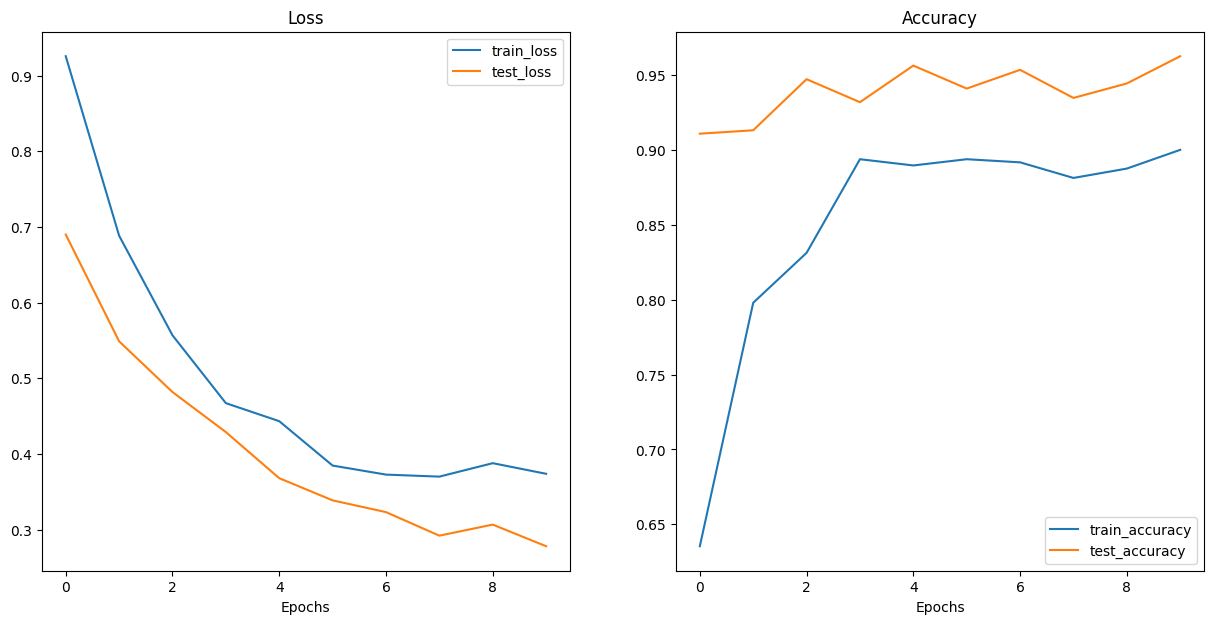

In [ ]:
from helper_functions import plot_loss_curves
plot_loss_curves(effnetb2_results)

In [ ]:
from going_modular.going_modular import utils

utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percent.pth


In [ ]:
from pathlib import Path

pretrained_effnetb2_model_size = Path("models/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size / (1024 * 1024)
pretrained_effnetb2_model_size

29.862421989440918

In [ ]:
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

In [ ]:
effnetb2_stats = {"test_loss" : effnetb2_results["test_loss"][-1],
                  "test_acc": effnetb2_results["test_acc"][-1],
                  "number_of_parameters" : effnetb2_total_params,
                  "model_size (MB)" : pretrained_effnetb2_model_size }
effnetb2_stats

{'test_loss': 0.27804592847824094,
 'test_acc': 0.9625,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29.862421989440918}

In [ ]:
def create_vit_model(num_classes:int=3):
  weights = torchvision.models.ViT_B_16_Weights.DEFAULT
  transform  = weights.transforms()
  model = torchvision.models.vit_b_16(weights = weights)
  for params in model.parameters():
    params.requires_grad = False

  model.heads = nn.Sequential(
   nn.Linear(in_features=768, out_features=num_classes),
  )
  return model, transform

In [ ]:
vit, vit_transforms = create_vit_model()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
summary(model=vit,
        input_size = (1,3,224,224),
        col_names=["input_size","output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

In [ ]:
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = vit_transforms,
    batch_size = 32
)

In [ ]:
# optimizer = torch.optim.Adam(params = vit.parameters(), lr=1e-3)
# loss_fn = torch.nn.CrossEntropyLoss()

# vit_results = engine.train(model=vit,
#                            train_dataloader = train_dataloader_vit,
#                            test_dataloader = test_dataloader_vit,
#                            epochs = 10,
#                            optimizer= optimizer,
#                            loss_fn=loss_fn,
#                            device=device)

In [ ]:
# plot_loss_curves(vit_results)

In [ ]:
# utils.save_model(model=vit,
#                  target_dir="models",
#                  model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

In [ ]:
# from pathlib import Path
# pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size / (1024 * 1024)
# print(f"Pretrained ViT feature extractor model size : {pretrained_vit_model_size} MB")

In [ ]:
# vit_total_params = sum(torch.numel(param) for param in vit.parameters())
# vit_total_params

In [ ]:
# effnetb2_total_params

In [ ]:
# vit_stats = {
#     "test_loss" : vit_results["test_loss"][-1],
#     "test_acc" : vit_results["test_acc"][-1],
#     "number_of_parameters" : vit_total_params,
#     "model_size (MB)" : pretrained_vit_model_size
# }

In [ ]:
# vit_stats

In [ ]:
from pathlib import Path

test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[:5]

[PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/2903125.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/593071.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/3886015.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/511818.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/1683426.jpg')]

In [ ]:
import pathlib
import torch

from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

# 1. Create a function to return a list of dictionaries with sample, truth label, prediction, prediction probability and prediction time
def pred_and_store(paths: List[pathlib.Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:

    # 2. Create an empty list to store prediction dictionaries
    pred_list = []

    # 3. Loop through target paths
    for path in tqdm(paths):

        # 4. Create empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground truth class name
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name

        # 6. Start the prediction timer
        start_time = timer()

        # 7. Open image path
        img = Image.open(path)

        # 8. Transform the image, add batch dimension and put image on target device
        transformed_image = transform(img).unsqueeze(0).to(device)

        # 9. Prepare model for inference by sending it to target device and turning on eval() mode
        model.to(device)
        model.eval()

        # 10. Get prediction probability, predicition label and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure things in the dictionary are on CPU (required for inspecting predictions later on)
            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class

            # 12. End the timer and calculate time per pred
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time-start_time, 4)

        # 13. Does the pred match the true label?
        pred_dict["correct"] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)

    # 15. Return list of prediction dictionaries
    return pred_list

In [ ]:
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu")

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
effnetb2_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/2903125.jpg'),
  'class_name': 'sushi',
  'pred_prob': 0.7891,
  'pred_class': 'sushi',
  'time_for_pred': 0.3702,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/sushi/593071.jpg'),
  'class_name': 'sushi',
  'pred_prob': 0.8081,
  'pred_class': 'sushi',
  'time_for_pred': 0.1421,
  'correct': True}]

In [ ]:
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/sushi/2...,sushi,0.7891,sushi,0.3702,True
1,data/pizza_steak_sushi_20_percent/test/sushi/5...,sushi,0.8081,sushi,0.1421,True
2,data/pizza_steak_sushi_20_percent/test/sushi/3...,sushi,0.9475,sushi,0.1394,True
3,data/pizza_steak_sushi_20_percent/test/sushi/5...,sushi,0.5977,sushi,0.1399,True
4,data/pizza_steak_sushi_20_percent/test/sushi/1...,sushi,0.6239,sushi,0.1455,True


In [ ]:
effnetb2_test_pred_df.correct.value_counts()

,count
correct,
True,144
False,6


In [ ]:
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
effnetb2_average_time_per_pred

np.float64(0.1091)

In [ ]:
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=vit,
                                          transform=vit_transforms,
                                          class_names=class_names,
                                          device="cpu")

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
# vit_test_pred_dicts_df = pd.DataFrame(vit_test_pred_dicts)
# vit_test_pred_dicts_df.head()

In [ ]:
# vit_test_pred_dicts_df.correct.value_counts()

In [ ]:
# vit_average_time_per_pred = round(vit_test_pred_dicts_df.time_for_pred.mean(), 4)
# vit_average_time_per_pred

In [ ]:
# # Add average prediction time for ViT model on CPU
# vit_stats["time_per_pred_cpu"] = vit_average_time_per_pred
# vit_stats

In [ ]:
# Add EffNetB2 average prediction time to stats dictionary
# effnetb2_stats["time_per_pred_cpu"] = effnetb2_average_time_per_pred
# effnetb2_stats

In [ ]:
# df = pd.DataFrame([effnetb2_stats, vit_stats])

# df["model"] = ["EffNetB2", "ViT"]

# df["test_acc"] = round(df["test_acc"] * 100, 2)

# df

In [ ]:
# pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]),
#              columns=["ViT to EffNetB2 ratios"]).T

In [ ]:
# Import/install Gradio
try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

Gradio version: 5.49.1


In [ ]:
#Put our model on the cpu
effnetb2 = effnetb2.to("cpu")

next(iter(effnetb2.parameters())).device

device(type='cpu')

In [ ]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
  start_time = timer()
  img = effnetb2_transforms(img).unsqueeze(0)

  effnetb2.eval()
  with torch.inference_mode():
    pred_probs = torch.softmax(effnetb2(img), dim=1)
  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
  end_time = timer()
  pred_time = round(end_time - start_time, 4)
  return pred_labels_and_probs, pred_time

In [ ]:
import random
from PIL import Image

test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
test_data_paths[0]

random_image_path = random.sample(test_data_paths, k=1)[0]
random_image_path

image = Image.open(random_image_path)

pred_dict, pred_time = predict(img=image)
print(pred_dict)
print(pred_time)

{'pizza': 0.9242616295814514, 'steak': 0.02981271781027317, 'sushi': 0.04592553526163101}
0.1055


In [ ]:
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/pizza_steak_sushi_20_percent/test/sushi/911808.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/pizza/788315.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/sushi/1404154.jpg']]

In [ ]:
import gradio as gr

title = "FoodVision Mini🍕🥩🍣"
description = "An EfficientNetB2 features extractor computer vision model to classify images as pizza, sushi, steak"
article = "Created at 09. PyTorch Model Deployment"

demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"),
                          gr.Number(label="Prediction time (s)")],
                    examples = example_list,
                    title=title,
                    description=description,
                    article=article
                    )
demo.launch(debug=False,
            share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://154eb05bbe6103be94.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import shutil
from pathlib import Path

foodvision_mini_demo_path = Path("demos/foodvision_mini/")

if foodvision_mini_demo_path.exists():
  shutil.rmtree(foodvision_mini_demo_path)
  foodvision_mini_demo_path.mkdir(parents=True,
                                  exist_ok=True)
else:
  foodvision_mini_demo_path.mkdir(parents=True,
                                  exist_ok=True)


In [ ]:
import shutil
foodvision_mini_examples_path = foodvision_mini_demo_path /"examples"
foodvision_mini_examples_path.mkdir(parents=True, exist_ok=True)

foodvision_mini_examples = [Path('data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg')]

for example in foodvision_mini_examples:
  destination = foodvision_mini_examples_path / example.name
  print(f"[INFO] Copying {example} to {destination}")
  shutil.copy2(src=example,
               dst=destination)
  print(destination)
  print(example.name)

[INFO] Copying data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg to demos/foodvision_mini/examples/592799.jpg
demos/foodvision_mini/examples/592799.jpg
592799.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg to demos/foodvision_mini/examples/3622237.jpg
demos/foodvision_mini/examples/3622237.jpg
3622237.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg to demos/foodvision_mini/examples/2582289.jpg
demos/foodvision_mini/examples/2582289.jpg
2582289.jpg


In [ ]:
import os

example_list = [["examples/" + example] for example in os.listdir(foodvision_mini_examples_path)]

In [ ]:
effnetb2_foodvision_mini_model_path = "models/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percentt.pth"

effnetb2_foodvision_mini_model_destination = foodvision_mini_demo_path / effnetb2_foodvision_mini_model_path.split("/")[1]


try:
  print(f"[INFO] Attemption to move {effnetb2_foodvision_mini_model_path} to {effnetb2_foodvision_mini_model_destination}")

  shutil.move(src=effnetb2_foodvision_mini_model_path,
              dst=effnetb2_foodvision_mini_model_destination)
  print(f"[INFO] Model move complete.")
except:
  print(f"[INFO] No model found at {effnetb2_foodvision_mini_model_path}")
  print(f"[INFO] Model exists at {effnetb2_foodvision_mini_model_destination} : {effnetb2_foodvision_mini_model_destination.exists()}")

[INFO] Attemption to move models/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percentt.pth to demos/foodvision_mini/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percentt.pth
[INFO] No model found at models/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percentt.pth
[INFO] Model exists at demos/foodvision_mini/09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percentt.pth : False


In [ ]:
%%writefile demos/foodvision_mini/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = effnetb2_weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=effnetb2_weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

Writing demos/foodvision_mini/model.py


In [ ]:
from demos.foodvision_mini import model
effnetb2_model, effnetb2_transforms_import = model.create_effnetb2_model()
effnetb2_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
%%writefile demos/foodvision_mini/app.py
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

class_names = ["pizza", "steak", "sushi"]

effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=3)

effnetb2.load_state_dict(
    torch.load(
        f="09_pretrain_effnet_feature_extractor_pizza_steak_sushi_20_percentt.pth",
        map_location = torch.device("cpu")
    )
)

from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
  start_time = timer()
  img = effnetb2_transforms(img).unsqueeze(0)

  effnetb2.eval()
  with torch.inference_mode():
    pred_probs = torch.softmax(effnetb2(img), dim=1)
  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
  end_time = timer()
  pred_time = round(end_time - start_time, 4)
  return pred_labels_and_probs, pred_time


import gradio as gr

title = "FoodVision Mini🍕🥩🍣"
description = "An EfficientNetB2 features extractor computer vision model to classify images as pizza, sushi, steak"
article = "Created at 09. PyTorch Model Deployment"

example_list = [["examples/" + example] for example in os.listdir("examples")]

demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"),
                          gr.Number(label="Prediction time (s)")],
                    examples = example_list,
                    title=title,
                    description=description,
                    article=article
                    )
demo.launch(debug=False,
            share=True)

Writing demos/foodvision_mini/app.py


In [ ]:
%%writefile demos/foodvision_mini/requirements.txt
torch==2.9.0
torchvision==0.24.0
gradio==5.49.1

Writing demos/foodvision_mini/requirements.txt


In [ ]:
torch.__version__, torchvision.__version__, gr.__version__

('2.9.0+cu128', '0.24.0+cu128', '5.49.1')

In [ ]:
!cd demos/foodvision_mini && zip -r ../foodvision_mini.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

updating: app.py (deflated 54%)
updating: examples/ (stored 0%)
updating: examples/2582289.jpg (deflated 17%)
updating: examples/3622237.jpg (deflated 0%)
updating: examples/592799.jpg (deflated 1%)
updating: model.py (deflated 56%)
updating: requirements.txt (deflated 4%)


In [ ]:
try:
  from google.colab import files
  files.download("demos/foodvision_mini.zip")
except:
  print(f"Not running in Google colab, please download file manually")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# IPython is a library to help make Python interactive
from IPython.display import IFrame

# Embed FoodVision Mini Gradio demo
IFrame(src="https://huggingface.co/spaces/Darkdev007/foodvision_mini_video/+", width=900, height=750)

In [ ]:
effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

In [ ]:
from torchinfo import summary
summary(effnetb2_food101,
        input_size=[1,3,224,224],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 101]             --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

In [ ]:
food_101_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnetb2_transforms])

In [ ]:
food_101_transforms

Compose(
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)
)

In [ ]:
from torchvision import datasets
from pathlib import Path

data_dir = Path("data")

train_data = datasets.Food101(root=data_dir,
                              split="train",
                              transform=food_101_transforms,
                              download=True)

test_data = datasets.Food101(root=data_dir,
                             split="test",
                             transform=effnetb2_transforms,
                             download=True)

100%|██████████| 5.00G/5.00G [03:57<00:00, 21.0MB/s]


In [ ]:
food101_class_names = train_data.classes

food101_class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
from torch.utils.data import random_split

def split_dataset(dataset:torchvision.datasets,
                  split_size:float=0.2,
                  seed:int=42):
  length_1 = int(len(dataset) * split_size)
  length_2 = len(dataset) - length_1

  print(f"[INFO] Splitting dataset of length {len(dataset)} into splits of size : {length_1} and {length_2}")

  random_split_1, random_split_2 = torch.utils.data.random_split(dataset, lengths=[length_1, length_2],
                                                              generator = torch.manual_seed(seed))

  return random_split_1, random_split_2

In [ ]:
train_data_food101_20_percent, _ = split_dataset(dataset=train_data,
                                              split_size=0.2)
test_data_food101_20_percent, _ = split_dataset(dataset=test_data, split_size=0.2)

[INFO] Splitting dataset of length 75750 into splits of size : 15150 and 60600
[INFO] Splitting dataset of length 25250 into splits of size : 5050 and 20200


In [ ]:
len(train_data_food101_20_percent), len(train_data_food101_20_percent)

(15150, 15150)

In [ ]:
import torch
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_food101_20_percent = torch.utils.data.DataLoader(dataset=train_data_food101_20_percent,
                                                                  batch_size=BATCH_SIZE,
                                                                  shuffle=True,
                                                                  num_workers = NUM_WORKERS)

test_dataloader_food101_20_percent = torch.utils.data.DataLoader(dataset=test_data_food101_20_percent,
                                                                  batch_size=BATCH_SIZE,
                                                                  shuffle = False,
                                                                  num_workers = NUM_WORKERS)


In [ ]:
len(train_dataloader_food101_20_percent), len(test_dataloader_food101_20_percent)

(474, 158)

In [ ]:
optimizer = torch.optim.Adam(params=effnetb2_food101.parameters(), lr=1e-03 )

loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

effnetb2_food101_results = engine.train(model=effnetb2_food101,
                                        train_dataloader = train_dataloader_food101_20_percent,
                                        test_dataloader=test_dataloader_food101_20_percent,
                                        optimizer = optimizer,
                                        loss_fn = loss_fn,
                                        epochs=5,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.6387 | train_acc: 0.2827 | test_loss: 2.8046 | test_acc: 0.4862
Epoch: 2 | train_loss: 2.8647 | train_acc: 0.4342 | test_loss: 2.4604 | test_acc: 0.5453
Epoch: 3 | train_loss: 2.6479 | train_acc: 0.4861 | test_loss: 2.3628 | test_acc: 0.5561
Epoch: 4 | train_loss: 2.5486 | train_acc: 0.5081 | test_loss: 2.3103 | test_acc: 0.5759
Epoch: 5 | train_loss: 2.4989 | train_acc: 0.5237 | test_loss: 2.2747 | test_acc: 0.5838


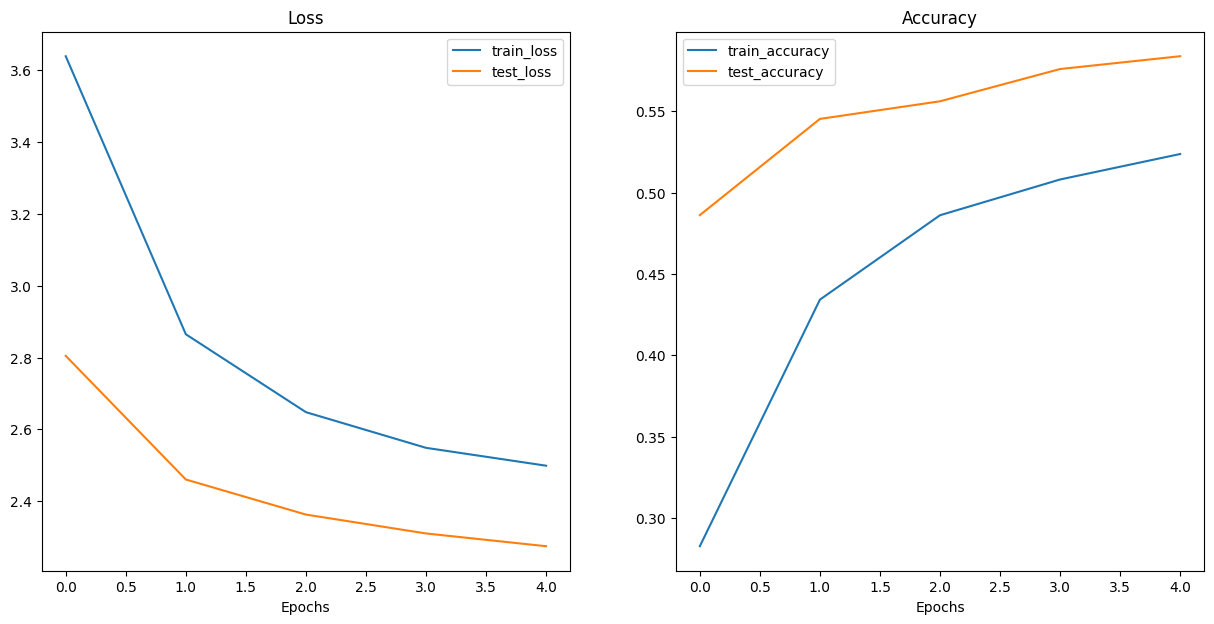

In [ ]:
plot_loss_curves(effnetb2_food101_results)

In [ ]:
effnetb2_food101_model_path = "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"

utils.save_model(model=effnetb2_food101,
                 target_dir="models/",
                 model_name=effnetb2_food101_model_path)

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth


In [ ]:
loaded_effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

loaded_effnetb2_food101.load_state_dict(torch.load("models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"))

<All keys matched successfully>

In [ ]:
from pathlib import Path

foodvision_big_demo_path= Path("demos/foodvision_big/")

foodvision_big_demo_path.mkdir(parents=True, exist_ok=True)

(foodvision_big_demo_path / "examples").mkdir(parents=True, exist_ok=True)

In [ ]:
!ls demos/foodvision_big/

examples


In [ ]:
# Download and move an example image
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg
!mv 04-pizza-dad.jpeg demos/foodvision_big/examples/04-pizza-dad.jpg

# Move trained model to FoodVision Big demo folder (will error if model is already moved)
!mv models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth demos/foodvision_big

--2025-11-04 15:46:55--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘04-pizza-dad.jpeg’

04-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-11-04 15:46:56 (288 MB/s) - ‘04-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
food101_class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
foodvision_big_class_names_path = foodvision_big_demo_path / "class_names.txt"
with open(foodvision_big_class_names_path, 'w') as f:
  print(f"[INFO] Saving Food101 class names to {foodvision_big_class_names_path}")
  f.write("\n".join(food101_class_names))

[INFO] Saving Food101 class names to demos/foodvision_big/class_names.txt


In [ ]:
with open(foodvision_big_class_names_path, 'r') as f:
  food101_class_names_loaded = [food.strip() for food in f.readlines()]

food101_class_names_loaded

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
len(food101_class_names_loaded)

101

In [ ]:
%%writefile demos/foodvision_big/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

Writing demos/foodvision_big/model.py


In [ ]:
%%writefile demos/foodvision_big/app.py
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

with open("class_names.txt", "r") as f:
  class_names = [food_name.strip() for food_name in f.readlines()]

effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=101)

effnetb2.load_state_dict(
    torch.load(f="09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth",
               map_location=torch.device("cpu"))
)

def predict(img) -> Tuple[Dict, float]:
  start_time = timer()
  img = effnetb2_transforms(img).unsqueeze(0)

  effnetb2.eval()
  with torch.inference_mode():
    pred_probs = torch.softmax(effnetb2(img), dim=1)
  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
  end_time = timer()
  pred_time = round(end_time - start_time, 4)
  return pred_labels_and_probs, pred_time

title = "FoodVision Mini👁️🍔💪"
description = "An EfficientNetB2 features extractor computer vision model to classify 101 classes of food"
article = "Created at 09. PyTorch Model Deployment"

example_list = [["examples/" + example] for example in os.listdir("examples")]

demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type="pil"),
                    outputs=[gr.Label(num_top_classes=5, label="Predictions"),
                          gr.Number(label="Prediction time (s)")],
                    examples = example_list,
                    title=title,
                    description=description,
                    article=article
                    )
demo.launch(debug=False,
            share=True)


Writing demos/foodvision_big/app.py


In [ ]:
%%writefile demos/foodvision_big/requirements.txt
torch==2.9.0
torchvision==0.24.0
gradio==5.49.1

Writing demos/foodvision_big/requirements.txt


In [ ]:
# Zip foodvision_big folder but exclude certain files
!cd demos/foodvision_big && zip -r ../foodvision_big.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Big app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/foodvision_big.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download()")

  adding: 09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth (deflated 8%)
  adding: app.py (deflated 53%)
  adding: class_names.txt (deflated 48%)
  adding: examples/ (stored 0%)
  adding: examples/04-pizza-dad.jpg (deflated 0%)
  adding: model.py (deflated 49%)
  adding: requirements.txt (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>